In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np


In [2]:
G = nx.read_edgelist('artist_rels.csv', data=(('nature',str),))

In [3]:

print(f"Order: {G.order()}")
print(f"Size: {G.size()}")

avg_degree = G.size() / G.order()

print(f"Avg degree: {avg_degree}")


Order: 195
Size: 183
Avg degree: 0.9384615384615385


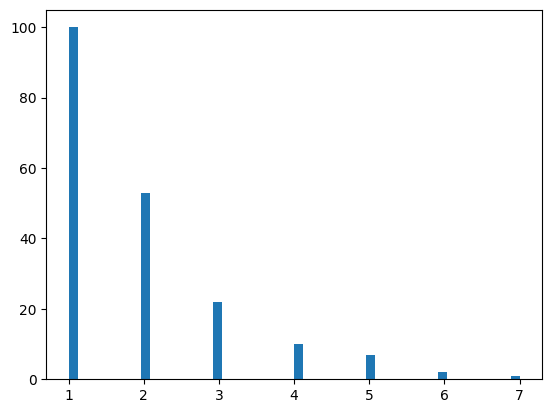

In [4]:
degrees = dict(G.degree())

degree_values = list(degrees.values())

plt.hist(degree_values, bins=50)
plt.show()


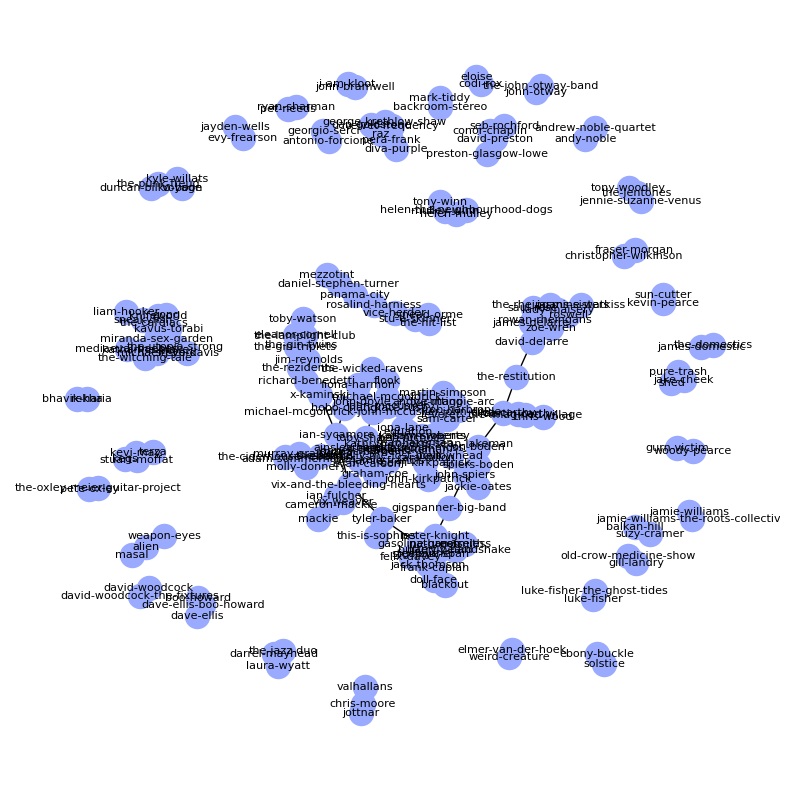

In [5]:

threshold = 1
nodes_to_keep = [node for node in G.nodes() if G.degree(node) >= threshold]
G_filtered = G.subgraph(nodes_to_keep)
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G_filtered)
nx.draw_networkx_nodes(G_filtered, pos, node_color='#99aaff')  # pale gray nodes
nx.draw_networkx_edges(G_filtered, pos)
nx.draw_networkx_labels(G_filtered, pos, font_size=8)  # smaller labels
plt.axis('off')
plt.tight_layout()
plt.show()

In [6]:
centrality = nx.degree_centrality(G)
centrality = nx.degree_centrality(G)
sorted_centrality = sorted(centrality.items(), key=lambda x: x[1], reverse=True)
print(sorted_centrality[:10])

[('seth-lakeman', 0.03608247422680412), ('sam-kelly-the-lost-boys', 0.030927835051546393), ('gasoline-green', 0.030927835051546393), ('vix-and-the-bleeding-hearts', 0.02577319587628866), ('john-spiers', 0.02577319587628866), ('jim-reynolds', 0.02577319587628866), ('kavus-torabi', 0.02577319587628866), ('sam-sweeney', 0.02577319587628866), ('sean-lakeman', 0.02577319587628866), ('equation', 0.02577319587628866)]


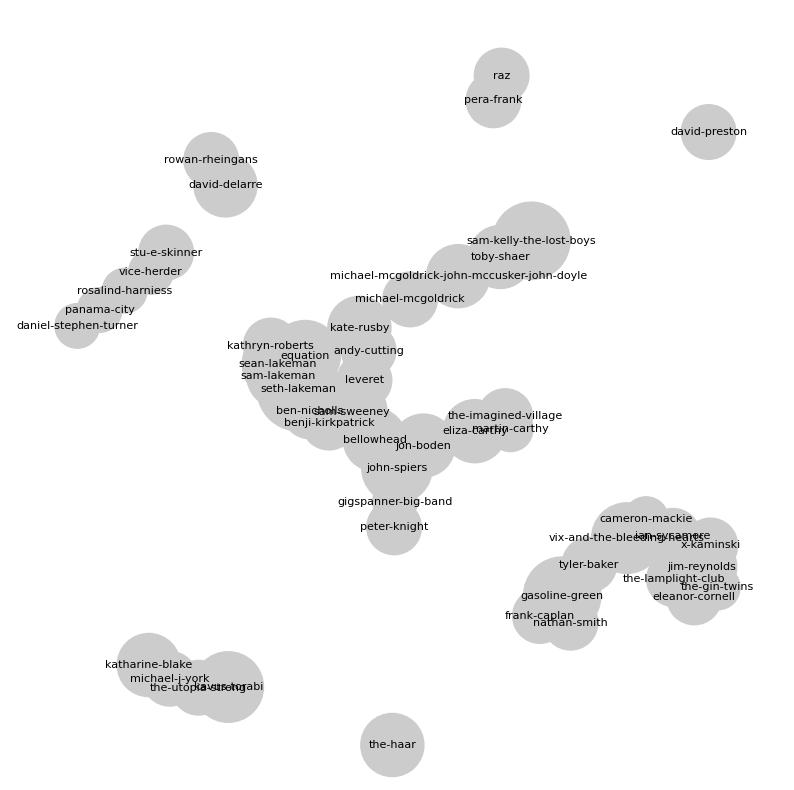

In [12]:
centrality = nx.degree_centrality(G)
top_nodes = sorted(centrality, key=centrality.get, reverse=True)[:50]
G_top = G.subgraph(top_nodes)

node_sizes = [centrality[node] * 100000 for node in G_top.nodes()]

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G_top)
nx.draw_networkx_nodes(G_top, pos, node_size=node_sizes, node_color='#cccccc')
nx.draw_networkx_edges(G_top, pos)
nx.draw_networkx_labels(G_top, pos, font_size=8)
plt.axis('off')
plt.show()